# Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn as svn
%matplotlib inline
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn import metrics

from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier)
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

# To perform statistical analysis
import scipy.stats as stats


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)
import warnings
warnings.filterwarnings("ignore")


In [8]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [9]:
data=pd.read_csv('clinial_EDA_good.csv',index_col=0)

In [10]:
data

,subject_id,Age_cat,BMI_cat,HEART,LUNG,KIDNEY,DIABETES,HTN,IMMUNO,Resp_Symp,...,abs_neut_0_cat,abs_lymph_0_cat,abs_mono_0_cat,creat_0_cat,crp_0_cat,ddimer_0_cat,ldh_0_cat,Trop_72h,days_hosp,prognosis
0,1,1,4,0,0,0,0,0,0,1,...,3.0,2.0,2.0,2.0,1.0,1.0,2.0,0,7,Favourable
1,2,2,2,0,0,0,0,0,0,1,...,3.0,3.0,3.0,2.0,3.0,2.0,2.0,0,7,Favourable
2,3,3,4,0,1,0,0,0,0,1,...,3.0,3.0,2.0,2.0,4.0,3.0,4.0,0,7,Favourable
3,4,1,2,0,0,0,0,0,0,1,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,0,7,Favourable
4,5,3,3,0,0,0,1,1,0,1,...,3.0,5.0,3.0,2.0,4.0,3.0,3.0,0,28,Favourable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,379,3,3,0,0,0,0,0,0,1,...,3.0,3.0,3.0,2.0,5.0,4.0,5.0,0,28,Favourable
377,380,3,2,0,0,0,0,0,0,1,...,4.0,2.0,2.0,2.0,5.0,3.0,5.0,0,28,Favourable
379,382,1,3,0,0,0,0,0,0,1,...,3.0,2.0,1.0,1.0,4.0,3.0,2.0,0,0,Unfavourable
380,383,5,1,0,0,1,1,1,0,1,...,3.0,2.0,2.0,2.0,3.0,4.0,5.0,0,0,Unfavourable


In [11]:
df=pd.DataFrame(data)
df

,subject_id,Age_cat,BMI_cat,HEART,LUNG,KIDNEY,DIABETES,HTN,IMMUNO,Resp_Symp,...,abs_neut_0_cat,abs_lymph_0_cat,abs_mono_0_cat,creat_0_cat,crp_0_cat,ddimer_0_cat,ldh_0_cat,Trop_72h,days_hosp,prognosis
0,1,1,4,0,0,0,0,0,0,1,...,3.0,2.0,2.0,2.0,1.0,1.0,2.0,0,7,Favourable
1,2,2,2,0,0,0,0,0,0,1,...,3.0,3.0,3.0,2.0,3.0,2.0,2.0,0,7,Favourable
2,3,3,4,0,1,0,0,0,0,1,...,3.0,3.0,2.0,2.0,4.0,3.0,4.0,0,7,Favourable
3,4,1,2,0,0,0,0,0,0,1,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,0,7,Favourable
4,5,3,3,0,0,0,1,1,0,1,...,3.0,5.0,3.0,2.0,4.0,3.0,3.0,0,28,Favourable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,379,3,3,0,0,0,0,0,0,1,...,3.0,3.0,3.0,2.0,5.0,4.0,5.0,0,28,Favourable
377,380,3,2,0,0,0,0,0,0,1,...,4.0,2.0,2.0,2.0,5.0,3.0,5.0,0,28,Favourable
379,382,1,3,0,0,0,0,0,0,1,...,3.0,2.0,1.0,1.0,4.0,3.0,2.0,0,0,Unfavourable
380,383,5,1,0,0,1,1,1,0,1,...,3.0,2.0,2.0,2.0,3.0,4.0,5.0,0,0,Unfavourable


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 0 to 382
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   subject_id       279 non-null    int64  
 1   Age_cat          279 non-null    int64  
 2   BMI_cat          279 non-null    int64  
 3   HEART            279 non-null    int64  
 4   LUNG             279 non-null    int64  
 5   KIDNEY           279 non-null    int64  
 6   DIABETES         279 non-null    int64  
 7   HTN              279 non-null    int64  
 8   IMMUNO           279 non-null    int64  
 9   Resp_Symp        279 non-null    int64  
 10  Fever_Sympt      279 non-null    int64  
 11  GI_Symp          279 non-null    int64  
 12  Acuity_0         279 non-null    int64  
 13  Acuity_3         279 non-null    int64  
 14  Acuity_7         279 non-null    int64  
 15  Acuity_28        279 non-null    int64  
 16  abs_neut_0_cat   279 non-null    float64
 17  abs_lymph_0_cat 

In [13]:
df.drop(columns=['subject_id','Acuity_0','Acuity_3','Acuity_7','Acuity_28'],inplace=True)

In [14]:
df

,Age_cat,BMI_cat,HEART,LUNG,KIDNEY,DIABETES,HTN,IMMUNO,Resp_Symp,Fever_Sympt,...,abs_neut_0_cat,abs_lymph_0_cat,abs_mono_0_cat,creat_0_cat,crp_0_cat,ddimer_0_cat,ldh_0_cat,Trop_72h,days_hosp,prognosis
0,1,4,0,0,0,0,0,0,1,1,...,3.0,2.0,2.0,2.0,1.0,1.0,2.0,0,7,Favourable
1,2,2,0,0,0,0,0,0,1,1,...,3.0,3.0,3.0,2.0,3.0,2.0,2.0,0,7,Favourable
2,3,4,0,1,0,0,0,0,1,0,...,3.0,3.0,2.0,2.0,4.0,3.0,4.0,0,7,Favourable
3,1,2,0,0,0,0,0,0,1,1,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,0,7,Favourable
4,3,3,0,0,0,1,1,0,1,1,...,3.0,5.0,3.0,2.0,4.0,3.0,3.0,0,28,Favourable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,3,3,0,0,0,0,0,0,1,1,...,3.0,3.0,3.0,2.0,5.0,4.0,5.0,0,28,Favourable
377,3,2,0,0,0,0,0,0,1,1,...,4.0,2.0,2.0,2.0,5.0,3.0,5.0,0,28,Favourable
379,1,3,0,0,0,0,0,0,1,1,...,3.0,2.0,1.0,1.0,4.0,3.0,2.0,0,0,Unfavourable
380,5,1,0,0,1,1,1,0,1,1,...,3.0,2.0,2.0,2.0,3.0,4.0,5.0,0,0,Unfavourable


# Preparing data for modeling

### Transformacion de las variables prognosis en variable categorica: Favorable -->1, Unfavourable -->0

In [15]:
df2 = df.copy()
df2

,Age_cat,BMI_cat,HEART,LUNG,KIDNEY,DIABETES,HTN,IMMUNO,Resp_Symp,Fever_Sympt,...,abs_neut_0_cat,abs_lymph_0_cat,abs_mono_0_cat,creat_0_cat,crp_0_cat,ddimer_0_cat,ldh_0_cat,Trop_72h,days_hosp,prognosis
0,1,4,0,0,0,0,0,0,1,1,...,3.0,2.0,2.0,2.0,1.0,1.0,2.0,0,7,Favourable
1,2,2,0,0,0,0,0,0,1,1,...,3.0,3.0,3.0,2.0,3.0,2.0,2.0,0,7,Favourable
2,3,4,0,1,0,0,0,0,1,0,...,3.0,3.0,2.0,2.0,4.0,3.0,4.0,0,7,Favourable
3,1,2,0,0,0,0,0,0,1,1,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,0,7,Favourable
4,3,3,0,0,0,1,1,0,1,1,...,3.0,5.0,3.0,2.0,4.0,3.0,3.0,0,28,Favourable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,3,3,0,0,0,0,0,0,1,1,...,3.0,3.0,3.0,2.0,5.0,4.0,5.0,0,28,Favourable
377,3,2,0,0,0,0,0,0,1,1,...,4.0,2.0,2.0,2.0,5.0,3.0,5.0,0,28,Favourable
379,1,3,0,0,0,0,0,0,1,1,...,3.0,2.0,1.0,1.0,4.0,3.0,2.0,0,0,Unfavourable
380,5,1,0,0,1,1,1,0,1,1,...,3.0,2.0,2.0,2.0,3.0,4.0,5.0,0,0,Unfavourable


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 0 to 382
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age_cat          279 non-null    int64  
 1   BMI_cat          279 non-null    int64  
 2   HEART            279 non-null    int64  
 3   LUNG             279 non-null    int64  
 4   KIDNEY           279 non-null    int64  
 5   DIABETES         279 non-null    int64  
 6   HTN              279 non-null    int64  
 7   IMMUNO           279 non-null    int64  
 8   Resp_Symp        279 non-null    int64  
 9   Fever_Sympt      279 non-null    int64  
 10  GI_Symp          279 non-null    int64  
 11  abs_neut_0_cat   279 non-null    float64
 12  abs_lymph_0_cat  279 non-null    float64
 13  abs_mono_0_cat   279 non-null    float64
 14  creat_0_cat      279 non-null    float64
 15  crp_0_cat        279 non-null    float64
 16  ddimer_0_cat     279 non-null    float64
 17  ldh_0_cat       

In [17]:
prog_cate= []
for i in df2['prognosis']:
    if i =='Favourable':
        prog_cate.append('1')
    else:
        prog_cate.append('0')
df2['prognosis']=prog_cate
df2

,Age_cat,BMI_cat,HEART,LUNG,KIDNEY,DIABETES,HTN,IMMUNO,Resp_Symp,Fever_Sympt,...,abs_neut_0_cat,abs_lymph_0_cat,abs_mono_0_cat,creat_0_cat,crp_0_cat,ddimer_0_cat,ldh_0_cat,Trop_72h,days_hosp,prognosis
0,1,4,0,0,0,0,0,0,1,1,...,3.0,2.0,2.0,2.0,1.0,1.0,2.0,0,7,1
1,2,2,0,0,0,0,0,0,1,1,...,3.0,3.0,3.0,2.0,3.0,2.0,2.0,0,7,1
2,3,4,0,1,0,0,0,0,1,0,...,3.0,3.0,2.0,2.0,4.0,3.0,4.0,0,7,1
3,1,2,0,0,0,0,0,0,1,1,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,0,7,1
4,3,3,0,0,0,1,1,0,1,1,...,3.0,5.0,3.0,2.0,4.0,3.0,3.0,0,28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,3,3,0,0,0,0,0,0,1,1,...,3.0,3.0,3.0,2.0,5.0,4.0,5.0,0,28,1
377,3,2,0,0,0,0,0,0,1,1,...,4.0,2.0,2.0,2.0,5.0,3.0,5.0,0,28,1
379,1,3,0,0,0,0,0,0,1,1,...,3.0,2.0,1.0,1.0,4.0,3.0,2.0,0,0,0
380,5,1,0,0,1,1,1,0,1,1,...,3.0,2.0,2.0,2.0,3.0,4.0,5.0,0,0,0


In [18]:
# Before creating any models, it is important to transform variables in categorical type. 
for feature in df2.columns:
    if df2[feature].dtype == 'object':
        df2[feature]=pd.Categorical(df2[feature])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 0 to 382
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Age_cat          279 non-null    int64   
 1   BMI_cat          279 non-null    int64   
 2   HEART            279 non-null    int64   
 3   LUNG             279 non-null    int64   
 4   KIDNEY           279 non-null    int64   
 5   DIABETES         279 non-null    int64   
 6   HTN              279 non-null    int64   
 7   IMMUNO           279 non-null    int64   
 8   Resp_Symp        279 non-null    int64   
 9   Fever_Sympt      279 non-null    int64   
 10  GI_Symp          279 non-null    int64   
 11  abs_neut_0_cat   279 non-null    float64 
 12  abs_lymph_0_cat  279 non-null    float64 
 13  abs_mono_0_cat   279 non-null    float64 
 14  creat_0_cat      279 non-null    float64 
 15  crp_0_cat        279 non-null    float64 
 16  ddimer_0_cat     279 non-null    float64 
 1

# Preprocessing Data

In [33]:
#Removing variable days_prog
df2.drop(['days_hosp'],axis=1, inplace=True)
df2

,Age_cat,BMI_cat,HEART,LUNG,KIDNEY,DIABETES,HTN,IMMUNO,Resp_Symp,Fever_Sympt,GI_Symp,abs_neut_0_cat,abs_lymph_0_cat,abs_mono_0_cat,creat_0_cat,crp_0_cat,ddimer_0_cat,ldh_0_cat,Trop_72h,prognosis
0,1,4,0,0,0,0,0,0,1,1,1,3.0,2.0,2.0,2.0,1.0,1.0,2.0,0,1
1,2,2,0,0,0,0,0,0,1,1,1,3.0,3.0,3.0,2.0,3.0,2.0,2.0,0,1
2,3,4,0,1,0,0,0,0,1,0,1,3.0,3.0,2.0,2.0,4.0,3.0,4.0,0,1
3,1,2,0,0,0,0,0,0,1,1,0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,0,1
4,3,3,0,0,0,1,1,0,1,1,1,3.0,5.0,3.0,2.0,4.0,3.0,3.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,3,3,0,0,0,0,0,0,1,1,0,3.0,3.0,3.0,2.0,5.0,4.0,5.0,0,1
377,3,2,0,0,0,0,0,0,1,1,0,4.0,2.0,2.0,2.0,5.0,3.0,5.0,0,1
379,1,3,0,0,0,0,0,0,1,1,1,3.0,2.0,1.0,1.0,4.0,3.0,2.0,0,0
380,5,1,0,0,1,1,1,0,1,1,1,3.0,2.0,2.0,2.0,3.0,4.0,5.0,0,0


In [34]:
X = df2.drop(['prognosis'],axis=1)
Y = df2['prognosis']

In [35]:
X.astype(int)
X=pd.get_dummies(X, drop_first=True)

### Comprobacion del tamaño de la variable prognosis

In [111]:
df2['prognosis'].value_counts(normalize=True)*100

1    72.401434
0    27.598566
Name: prognosis, dtype: float64

**Cerca del 72% de los datos son etiquetados como 'Favourable', por lo que el dataset se encuentra desbalanceado. Se decide aplicar SMOTE para generar variables sinteticas de 'Unfavourable'**

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

In [38]:
X2 = X.copy()
Y2 = Y.copy()
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.3, random_state=1, stratify=Y)

In [39]:
y_train2

327    1
97     1
382    1
4      1
26     1
      ..
364    1
262    1
277    0
69     1
308    0
Name: prognosis, Length: 195, dtype: category
Categories (2, object): ['0', '1']

In [40]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
sm = SMOTE(sampling_strategy=0.9, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train2, y_train2)

In [41]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == '1')))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == '0')))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == '1')))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == '0')))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, count of label '1': 141
Before OverSampling, count of label '0': 54 

After OverSampling, count of label '1': 141
After OverSampling, count of label '0': 126 

After OverSampling, the shape of train_X: (267, 19)
After OverSampling, the shape of train_y: (267,) 



In [42]:
df_train_test = pd.DataFrame({'Shape of training': X_train.shape,
                              'Shape of test':X_test.shape,
                              'Percentage of classes in training set':y_train.value_counts(normalize=True)*100,
                              'Percenatage of classes in testing set':y_test.value_counts(normalize=True)*100                             
                             })
df_train_test

,Shape of training,Shape of test,Percentage of classes in training set,Percenatage of classes in testing set
1,195,84,72.307692,72.619048
0,19,19,27.692308,27.380952


In [43]:
df_train_test_over = pd.DataFrame({'Shape of training': X_train_over.shape,
                              'Shape of test':X_test.shape,
                              'Percentage of classes in training set':y_train_over.value_counts(normalize=True)*100,
                              'Percenatage of classes in testing set':y_test.value_counts(normalize=True)*100                             
                             })
df_train_test_over

,Shape of training,Shape of test,Percentage of classes in training set,Percenatage of classes in testing set
1,267,84,52.808989,72.619048
0,19,19,47.191011,27.380952


# Classification model

# Decision Tree

In [44]:
model_DT= DecisionTreeClassifier(criterion='gini' ,random_state=1)
model_DT.fit(X_train_over, y_train_over)

DecisionTreeClassifier(random_state=1)

In [45]:
DT_train_performance = model_performance_classification_sklearn(model_DT, X_train_over, y_train_over)
DT_test_performance = model_performance_classification_sklearn(model_DT, X_test, y_test)

In [46]:
print(f'Performance of train set\n:{DT_train_performance}')
print(f'Performance of test set\n:{DT_test_performance}')

Performance of train set
:   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Performance of test set
:   Accuracy    Recall  Precision        F1
0  0.630952  0.688525   0.777778  0.730435


### Decision Tree Hypertuning

In [47]:
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}
recall_dtree = metrics.make_scorer(metrics.recall_score)
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=recall_dtree, cv=5)

grid_obj = grid_obj.fit(X_train_over, y_train_over) 
dtree_estimator = grid_obj.best_estimator_
dtree_estimator.fit(X_train_over, y_train_over)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

In [48]:
DT_train_performance_hyper = model_performance_classification_sklearn(dtree_estimator, X_train, y_train)
DT_test_performance_hyper = model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
print(f'Performance of train set\n:{DT_train_performance_hyper}')
print(f'Performance of test set\n:{DT_test_performance_hyper}')

Performance of train set
:   Accuracy   Recall  Precision       F1
0  0.758974  0.87234   0.809211  0.83959
Performance of test set
:   Accuracy    Recall  Precision       F1
0  0.702381  0.885246       0.75  0.81203


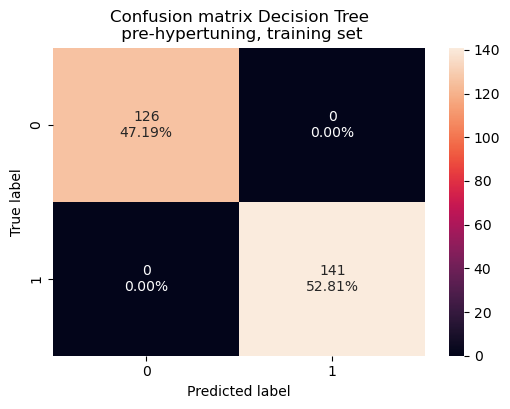

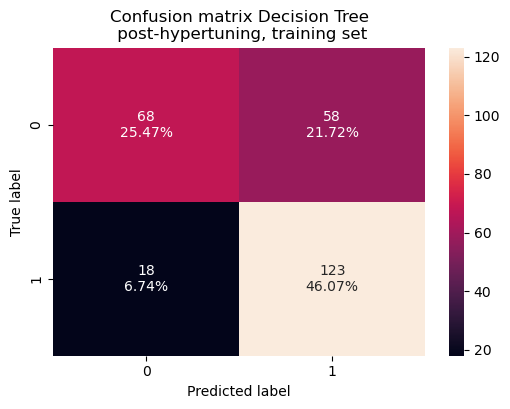

In [49]:
confusion_matrix_sklearn(model_DT, X_train_over, y_train_over, 
                          title='Confusion matrix Decision Tree\n pre-hypertuning, training set')
                          
confusion_matrix_sklearn(dtree_estimator,
                          X_train_over, y_train_over ,
                          title='Confusion matrix Decision Tree\n post-hypertuning, training set')

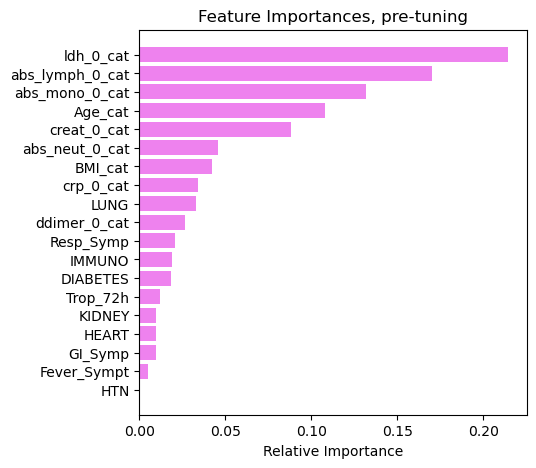

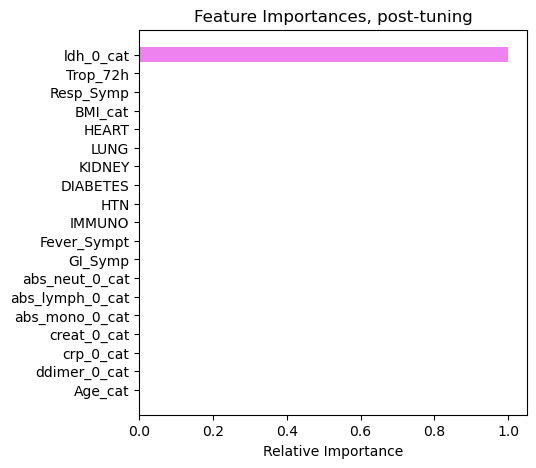

In [50]:
impor_feat(model_DT, title='pre-tuning')
impor_feat(dtree_estimator, title='post-tuning')

# Random Forest

In [51]:
rf=RandomForestClassifier(random_state=1)
rf.fit(X_train_over, y_train_over)

RandomForestClassifier(random_state=1)

In [52]:
rf_train_performance = model_performance_classification_sklearn(rf, X_train_over, y_train_over)
rf_test_performance = model_performance_classification_sklearn(rf, X_test, y_test)
print(f'Performance of train set\n:{rf_train_performance}')
print(f'Performance of test set\n:{rf_test_performance}')

Performance of train set
:   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Performance of test set
:   Accuracy    Recall  Precision       F1
0  0.702381  0.868852   0.757143  0.80916


In [53]:

rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
rf_recall = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=recall_score,cv=5)
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train_over, y_train_over)

RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_split=5,
                       n_estimators=15, oob_score=True, random_state=1)

In [54]:
rf_train_performance_tuned = model_performance_classification_sklearn(rf_tuned, X_train_over, y_train_over)
rf_test_performance_tuned = model_performance_classification_sklearn(rf_tuned, X_test, y_test)
print(f'Performance of train set\n:{rf_train_performance_tuned}')
print(f'Performance of test set\n:{rf_test_performance_tuned}')

Performance of train set
:   Accuracy    Recall  Precision        F1
0  0.902622  0.907801   0.907801  0.907801
Performance of test set
:   Accuracy    Recall  Precision       F1
0  0.761905  0.868852   0.815385  0.84127


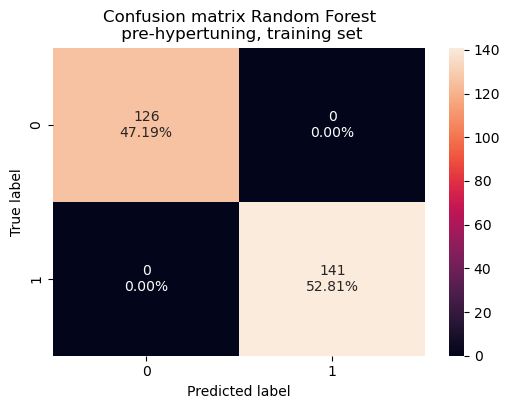

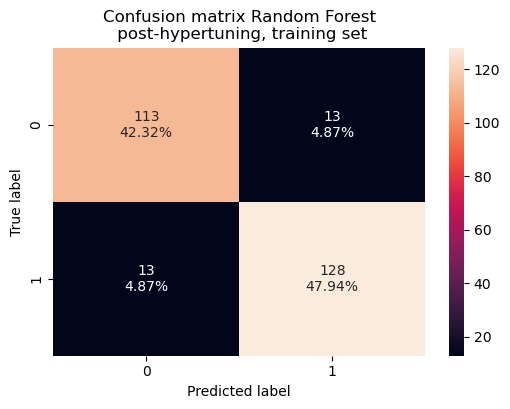

In [55]:
confusion_matrix_sklearn(rf, X_train_over, y_train_over, title='Confusion matrix Random Forest\n pre-hypertuning, training set')
confusion_matrix_sklearn(rf_tuned, X_train_over, y_train_over, title='Confusion matrix Random Forest\n post-hypertuning, training set')

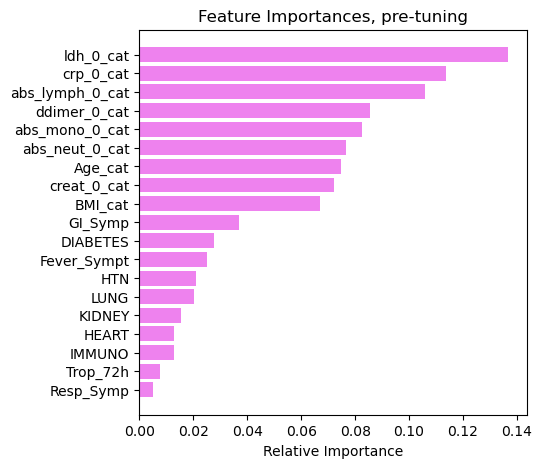

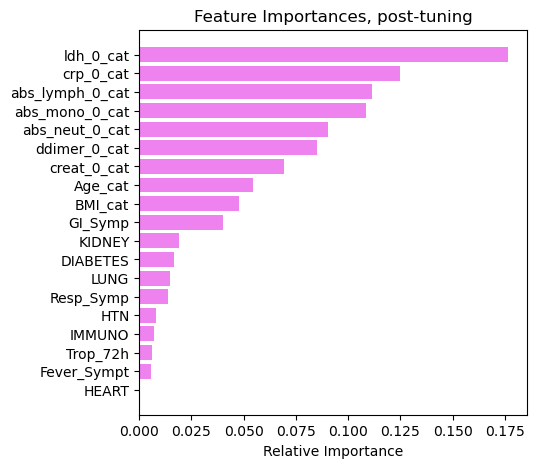

In [56]:
impor_feat(rf, title='pre-tuning')
impor_feat(rf_tuned, title='post-tuning')

## Bagging Classifier

In [57]:
bagging=BaggingClassifier(random_state=1)
bagging.fit(X_train_over, y_train_over)

BaggingClassifier(random_state=1)

In [58]:
bagg_train_performance = model_performance_classification_sklearn(bagging, X_train_over, y_train_over)
bagg_test_performance = model_performance_classification_sklearn(bagging, X_test, y_test)
print(f'Performance of train set\n:{bagg_train_performance}')
print(f'Performance of test set\n:{bagg_test_performance}')

Performance of train set
:   Accuracy    Recall  Precision        F1
0  0.992509  0.992908   0.992908  0.992908
Performance of test set
:   Accuracy    Recall  Precision        F1
0  0.654762  0.688525   0.807692  0.743363


In [59]:
bagging_tuned = BaggingClassifier(oob_score=True, bootstrap=True, random_state=1)
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }
bagging_recall = metrics.make_scorer(metrics.recall_score)
grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=bagging_recall,cv=5)
grid_obj = grid_obj.fit(X_train_over, y_train_over)
bagging_tuned = grid_obj.best_estimator_
bagging_tuned.fit(X_train_over, y_train_over)

BaggingClassifier(max_features=0.7, max_samples=0.7, oob_score=True,
                  random_state=1)

In [60]:
bagg_train_performance_tuned = model_performance_classification_sklearn(bagging_tuned, X_train_over, y_train_over)
bagg_test_performance_tuned = model_performance_classification_sklearn(bagging_tuned, X_train_over, y_train_over)
print(f'Performance of train set\n:{bagg_train_performance_tuned}')
print(f'Performance of test set\n:{bagg_test_performance_tuned}')

Performance of train set
:   Accuracy    Recall  Precision        F1
0  0.970037  0.964539   0.978417  0.971429
Performance of test set
:   Accuracy    Recall  Precision        F1
0  0.970037  0.964539   0.978417  0.971429


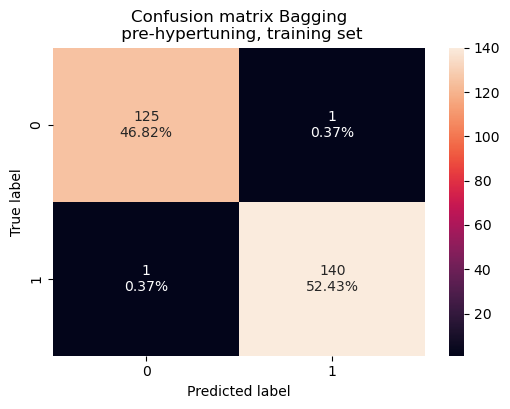

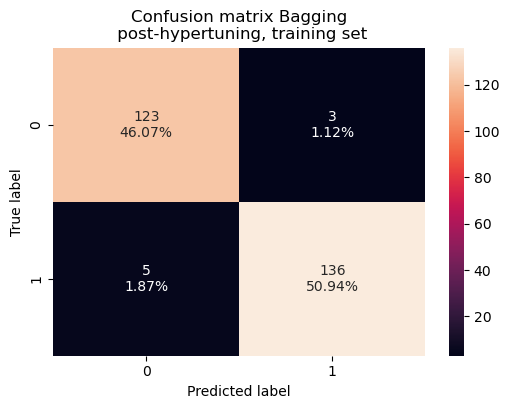

In [61]:
confusion_matrix_sklearn(bagging, X_train_over, y_train_over, title='Confusion matrix Bagging\n pre-hypertuning, training set')
confusion_matrix_sklearn(bagging_tuned, X_train_over, y_train_over, title='Confusion matrix Bagging\n post-hypertuning, training set')

# AdaBoosting

In [62]:
model_AdaBoost = AdaBoostClassifier(random_state=1)
model_AdaBoost.fit(X_train_over, y_train_over)

AdaBoostClassifier(random_state=1)

In [87]:
Ada_train_performance= model_performance_classification_sklearn(model_AdaBoost, X_train_over, y_train_over)
Ada_test_performance = model_performance_classification_sklearn(model_AdaBoost, X_test, y_test)
print(f'Performance of train set\n:{Ada_train_performance}')
print(f'Performance of test set\n:{Ada_test_performance}')

Performance of train set
:   Accuracy    Recall  Precision        F1
0  0.857678  0.879433   0.855172  0.867133
Performance of test set
:   Accuracy    Recall  Precision        F1
0  0.761905  0.803279   0.859649  0.830508


## Hypertuning - AdaBoosting

In [64]:
adaboos_tuned = AdaBoostClassifier(random_state=1)

parameters = {
    "base_estimator":[DecisionTreeClassifier(max_depth=1, class_weight='balanced', random_state=1),
                      DecisionTreeClassifier(max_depth=2, class_weight='balanced', random_state=1),
                      DecisionTreeClassifier(max_depth=3, class_weight='balanced', random_state=1)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}
recall_score_tuned = metrics.make_scorer(metrics.recall_score)
grid_obj = GridSearchCV(adaboos_tuned, parameters, scoring=recall_score_tuned,cv=5)
grid_obj = grid_obj.fit(X_train_over, y_train_over)
adaboos_tuned = grid_obj.best_estimator_
adaboos_tuned.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=10, random_state=1)

In [88]:
Ada_train_performance_tuned= model_performance_classification_sklearn(adaboos_tuned, X_train_over, y_train_over)
Ada_test_performance_tuned = model_performance_classification_sklearn(adaboos_tuned, X_test, y_test)
print(f'Performance of train set\n:{Ada_train_performance_tuned}')
print(f'Performance of test set\n:{Ada_test_performance_tuned}')

Performance of train set
:   Accuracy    Recall  Precision   F1
0  0.775281  0.851064   0.754717  0.8
Performance of test set
:   Accuracy    Recall  Precision        F1
0   0.72619  0.868852   0.779412  0.821705


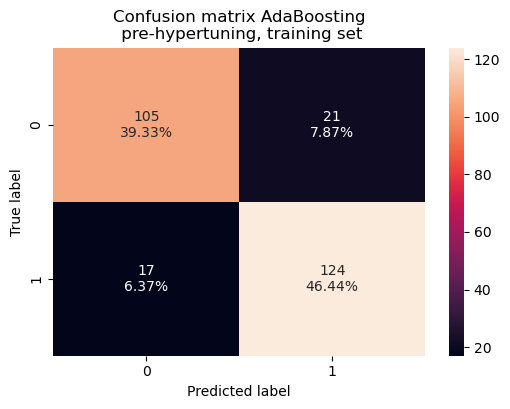

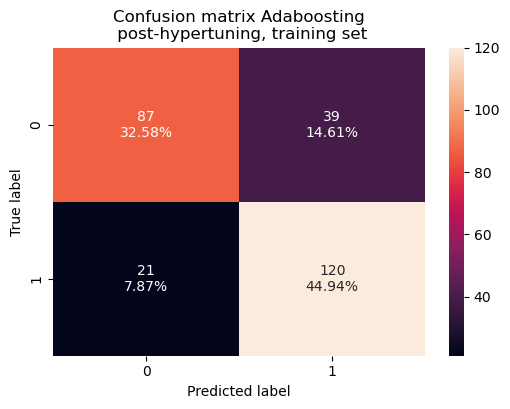

In [66]:
confusion_matrix_sklearn(model_AdaBoost, X_train_over, y_train_over, title='Confusion matrix AdaBoosting\n pre-hypertuning, training set')
confusion_matrix_sklearn(adaboos_tuned, X_train_over, y_train_over, title='Confusion matrix Adaboosting\n post-hypertuning, training set')

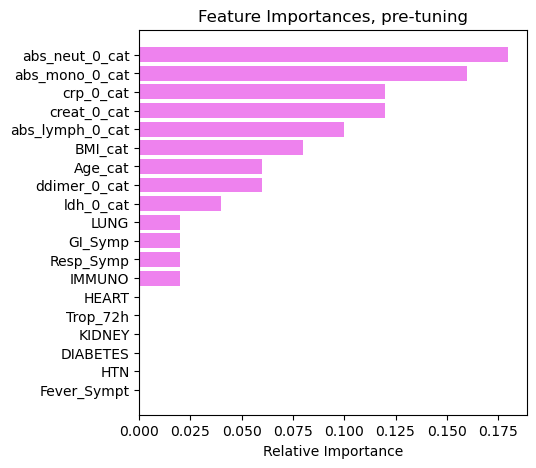

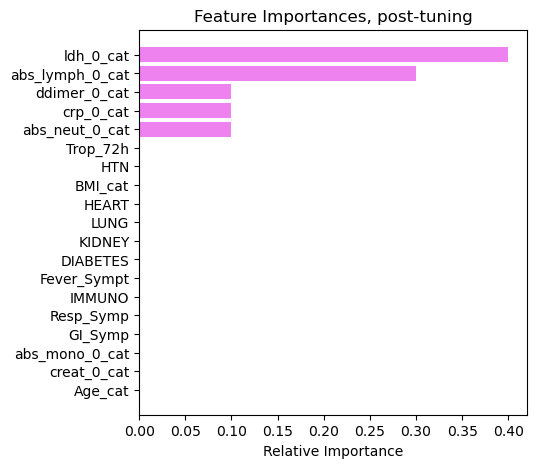

In [67]:
impor_feat(model_AdaBoost, title='pre-tuning')
impor_feat(adaboos_tuned, title='post-tuning')

# Gradient Boosting Classifier

In [68]:
model_gbc = GradientBoostingClassifier(random_state = 1)
model_gbc.fit(X_train_over, y_train_over)

GradientBoostingClassifier(random_state=1)

In [89]:
Gbc_train_performance = model_performance_classification_sklearn( model_gbc, X_train_over, y_train_over)
Gbc_test_performance = model_performance_classification_sklearn(model_gbc, X_test, y_test)
print(f'Performance of train set\n:{Gbc_train_performance}')
print(f'Performance of test set\n:{Gbc_test_performance}') 

Performance of train set
:   Accuracy    Recall  Precision        F1
0  0.977528  0.985816   0.972028  0.978873
Performance of test set
:   Accuracy    Recall  Precision   F1
0  0.714286  0.786885   0.813559  0.8


In [70]:
gdb_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}
gbc_recall = metrics.make_scorer(metrics.recall_score)
grid_obj = GridSearchCV(gdb_tuned, parameters, scoring=gbc_recall, cv=5)
grid_obj = grid_obj.fit(X_train_over, y_train_over)
gdb_tuned = grid_obj.best_estimator_
gdb_tuned.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=0.9)

In [90]:
Gbc_train_performance_tuning = model_performance_classification_sklearn(gdb_tuned, X_train_over, y_train_over)
Gbc_test_performance_tuning = model_performance_classification_sklearn(gdb_tuned, X_test, y_test)
print(f'Performance of train set\n:{Gbc_train_performance_tuning}')
print(f'Performance of test set\n:{Gbc_test_performance_tuning}') 

Performance of train set
:   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Performance of test set
:   Accuracy    Recall  Precision        F1
0  0.702381  0.786885        0.8  0.793388


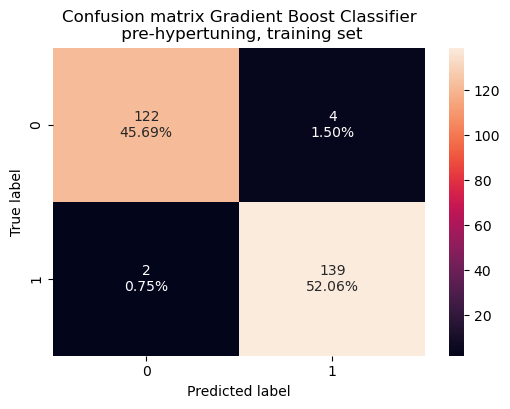

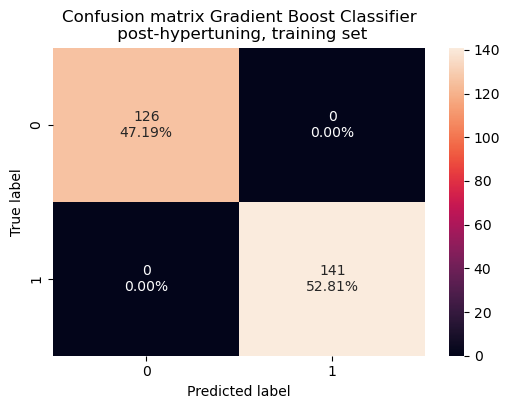

In [106]:
confusion_matrix_sklearn(model_gbc, X_train_over, y_train_over, title='Confusion matrix Gradient Boost Classifier\n pre-hypertuning, training set')
confusion_matrix_sklearn(gdb_tuned, X_train_over, y_train_over, title='Confusion matrix Gradient Boost Classifier\n post-hypertuning, training set')

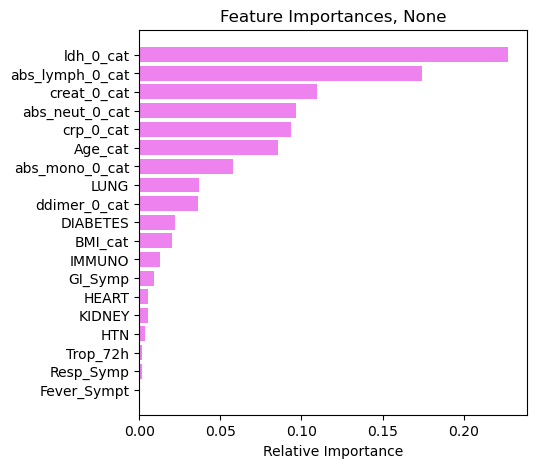

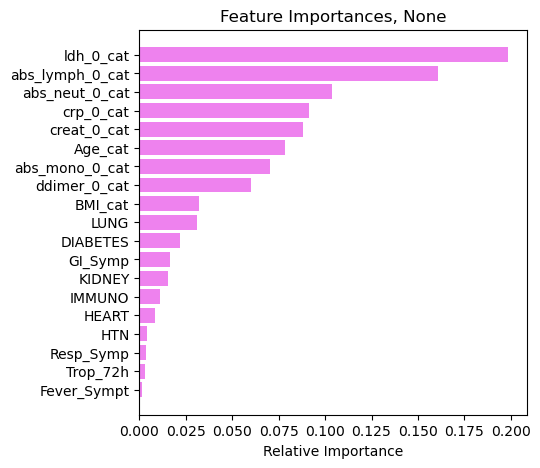

In [73]:
impor_feat(model_gbc)
impor_feat(gdb_tuned)

# XGBoost Classifier

In [74]:
model_xg= XGBClassifier(random_state=1)
model_xg.fit(X_train_over, y_train_over)

[21:52:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
xgb_train_performance = model_performance_classification_sklearn(model_xg, X_train_over, y_train_over)
xgb_test_performance = model_performance_classification_sklearn(model_xg, X_test, y_test)
print(f'Performance of train set\n:{xgb_train_performance}')
print(f'Performance of test set\n:{xgb_test_performance}') 


Performance of train set
:   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Performance of test set
:   Accuracy    Recall  Precision        F1
0  0.690476  0.786885   0.786885  0.786885


## Hyptertuning

In [76]:
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

# Type of scoring used to compare parameter combinations
xgb_recall = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=xgb_recall, cv=5)
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, eval_metric='logloss', gamma=3,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.9, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [77]:
xgb_train_performance_tuning = model_performance_classification_sklearn(xgb_tuned, X_train_over, y_train_over)
xgb_test_performance_tuning = model_performance_classification_sklearn(xgb_tuned, X_test, y_test)
print(f'Performance of train set\n:{xgb_train_performance_tuning}')
print(f'Performance of test set\n:{xgb_test_performance_tuning}') 

Performance of train set
:   Accuracy    Recall  Precision       F1
0  0.925094  0.943262   0.917241  0.93007
Performance of test set
:   Accuracy    Recall  Precision        F1
0   0.72619  0.819672   0.806452  0.813008


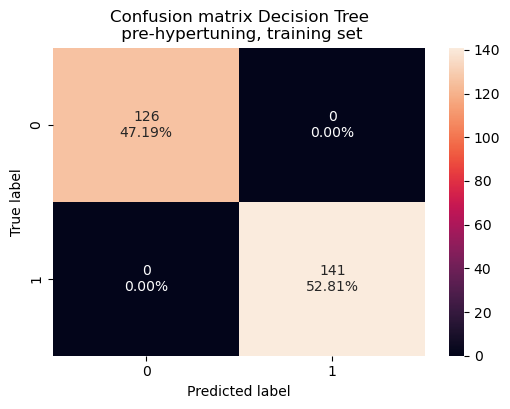

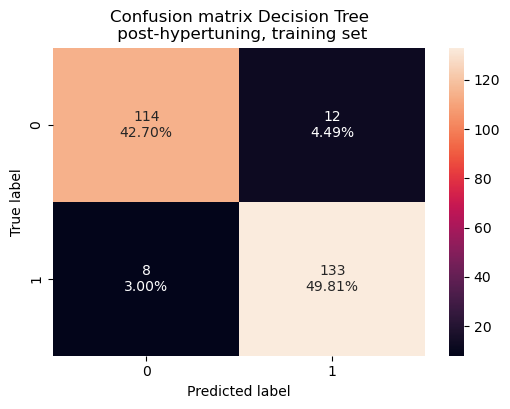

In [78]:
confusion_matrix_sklearn(model_xg, X_train_over, y_train_over, title='Confusion matrix Decision Tree\n pre-hypertuning, training set')
confusion_matrix_sklearn(xgb_tuned, X_train_over, y_train_over, title='Confusion matrix Decision Tree\n post-hypertuning, training set')

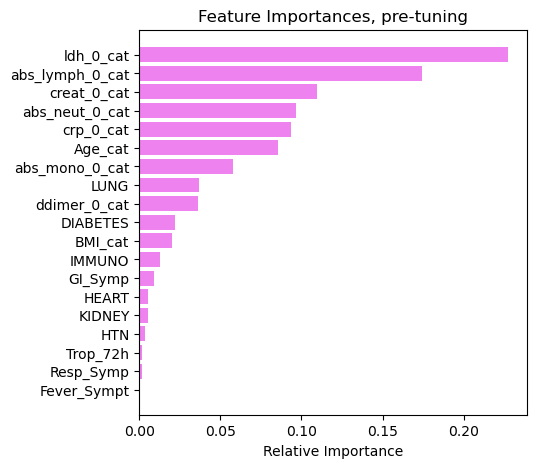

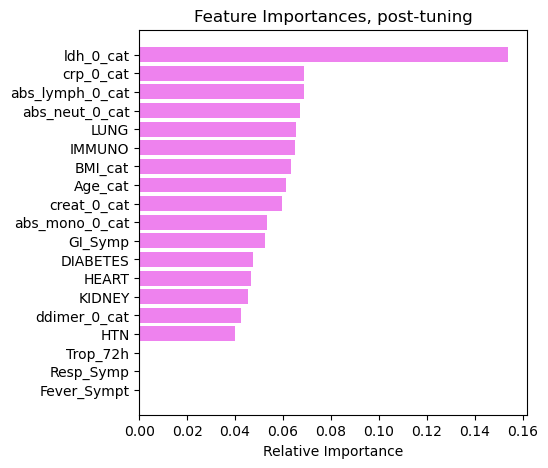

In [79]:
impor_feat(model_gbc, 'pre-tuning')
impor_feat(xgb_tuned, 'post-tuning')

# Stacking Classifier

In [91]:
estimators = [
    ("AdaBoost", adaboos_tuned),
    ("Gradient Boosting", gdb_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train_over, y_train_over)

StackingClassifier(estimators=[('AdaBoost',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                         max_depth=1,
                                                                                         random_state=1),
                                                   learning_rate=0.1,
                                                   n_estimators=10,
                                                   random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=200,
                                                           random_state=1,
                                             

Training performance:
    Accuracy    Recall  Precision        F1
0  0.958801  0.971631   0.951389  0.961404
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.702381  0.852459   0.764706  0.806202


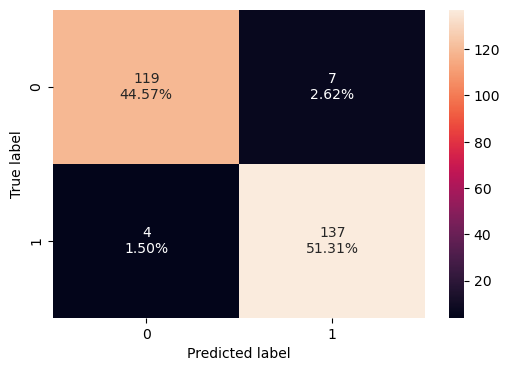

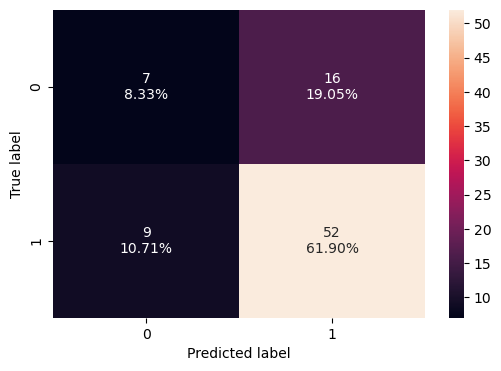

In [92]:
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train_over, y_train_over)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test, y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_train_over, y_train_over)
confusion_matrix_sklearn(stacking_classifier,X_test, y_test)

In [110]:
models_train_comp_df = pd.concat(
    [DT_train_performance.T, DT_train_performance_hyper.T,
     rf_train_performance.T,rf_train_performance_tuned.T,
     Ada_train_performance.T,Ada_train_performance_tuned.T,
     Gbc_train_performance.T,Gbc_train_performance_tuning.T,
     xgb_train_performance.T, xgb_train_performance_tuning.T,
     stacking_classifier_model_train_perf.T,
     bagg_train_performance.T,bagg_train_performance_tuned.T
     ],
    axis=1,
)

models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest",
    "Random Forest Tuned",
    "Adaboost Classifier",
    "Adaboost Tuned",
    "Gradient Boost",
    "Gradient Boost Tuned",
    "XGB",
    "XGB Tuned",
    "Stacking Classifier",
    "Bagging Classifier",
    'Bagging Classifier Tuned'
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,Adaboost Classifier,Adaboost Tuned,Gradient Boost,Gradient Boost Tuned,XGB,XGB Tuned,Stacking Classifier,Bagging Classifier,Bagging Classifier Tuned
Accuracy,1.0,0.758974,1.0,0.902622,0.857678,0.775281,0.977528,1.0,1.0,0.925094,0.958801,0.992509,0.970037
Recall,1.0,0.872340,1.0,0.907801,0.879433,0.851064,0.985816,1.0,1.0,0.943262,0.971631,0.992908,0.964539
Precision,1.0,0.809211,1.0,0.907801,0.855172,0.754717,0.972028,1.0,1.0,0.917241,0.951389,0.992908,0.978417
F1,1.0,0.839590,1.0,0.907801,0.867133,0.800000,0.978873,1.0,1.0,0.930070,0.961404,0.992908,0.971429


In [97]:
models_train_comp_df.to_excel('table3.xlsx')

In [95]:
models_test_comp_df = pd.concat(
    [DT_test_performance.T, DT_test_performance_hyper.T,
     rf_test_performance.T,rf_test_performance_tuned.T,
     Ada_test_performance.T,Ada_test_performance_tuned.T,
     Gbc_test_performance.T,Gbc_test_performance_tuning.T,
     xgb_test_performance.T, xgb_test_performance_tuning.T,
     stacking_classifier_model_test_perf.T,
     bagg_test_performance.T,bagg_test_performance_tuned.T
     ],
    axis=1,
)

models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest",
    "Random Forest Tuned",
    "Adaboost Classifier",
    "Adaboost Tuned",
    "Gradient Boost",
    "Gradient Boost Tuned",
    "XGB",
    "XGB Tuned",
    "Stacking Classifier",
    "Bagging Classifier",
    'Bagging Classifier Tuned'

]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,Adaboost Regressor,Adaboost Tuned,Gradient Boost,Gradient Boost Tuned,XGB,XGB Tuned,Stacking Classifier,Bagging Classifier,Bagging Classifier Tuned
Accuracy,0.630952,0.702381,0.702381,0.761905,0.761905,0.726190,0.714286,0.702381,0.690476,0.726190,0.702381,0.654762,0.970037
Recall,0.688525,0.885246,0.868852,0.868852,0.803279,0.868852,0.786885,0.786885,0.786885,0.819672,0.852459,0.688525,0.964539
Precision,0.777778,0.750000,0.757143,0.815385,0.859649,0.779412,0.813559,0.800000,0.786885,0.806452,0.764706,0.807692,0.978417
F1,0.730435,0.812030,0.809160,0.841270,0.830508,0.821705,0.800000,0.793388,0.786885,0.813008,0.806202,0.743363,0.971429


In [98]:
models_test_comp_df.to_excel('table4.xlsx')

# Conclusiones

**En este analisis, he realizado diferentes modelos de clasificacion con datos sinteticos obtenidos tras el metodo SMAT**

**Atendiendo a los parametros obtenidos en los diferentes algoritmos de clasificacion supervisada podemos concluir lo siguiente:**

**- En general los modelos han mejorado bastante el overfitting**
**- Teniendo en cuenta la métrica de recall, los modelos que mejor rendimiento ofrecen son:**
- Training set: Los mejores modelos son Decision-Tree tuned, AdaBooster y AdaBooster-tuned
- Testing set: Tras la optimización de las metricas (hypertuning) todos los modelos mejoran su rendimiento notablemente evitando el overfitting. 

Teniendo en cuenta la similitud entre las medidas en el set de entrenamiento y el set de testeo, el modelo de Decision-Tree tuned posee mayor similitud entre ambos grupos y se puede considerar un buen modelo para la prediccion de pacientes con una prognosis desfavorable.


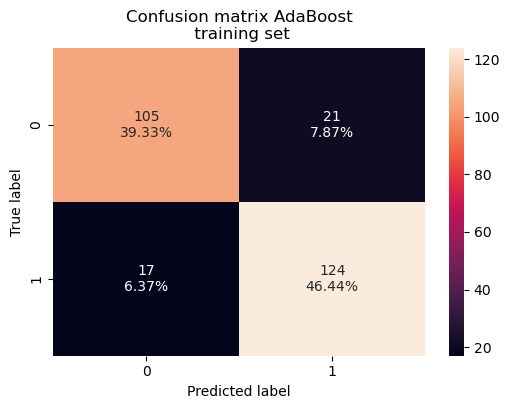

In [107]:
imagen8=confusion_matrix_sklearn(model_AdaBoost,
                        X_train_over, y_train_over,
                         title='Confusion matrix AdaBoost\n training set')

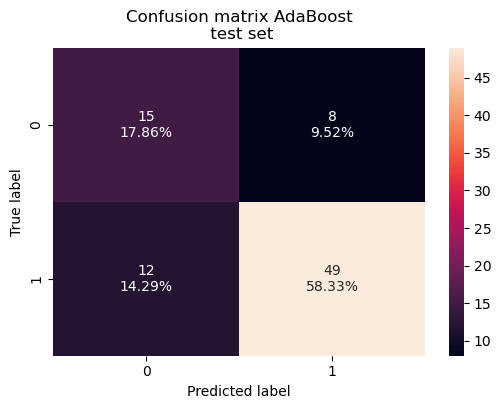

In [108]:
imagen9=confusion_matrix_sklearn(model_AdaBoost,
                        X_test, y_test,
                         title='Confusion matrix AdaBoost\n test set')

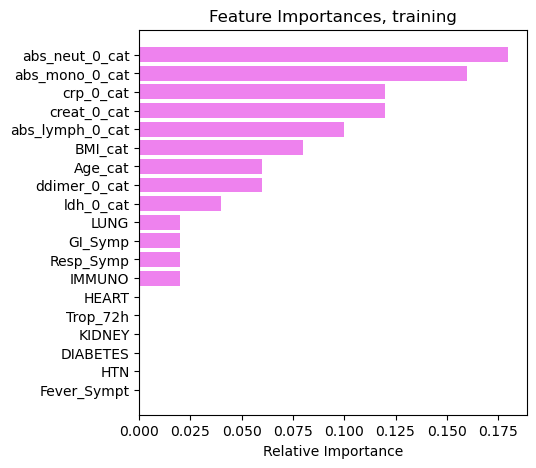

In [109]:
imagen10=impor_feat(model_AdaBoost,title='training')

# Annex

In [2]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, 
                          pos_label = '1')  # to compute Recall
    precision = precision_score(target, pred, pos_label='1')  # to compute Precision
    f1 = f1_score(target, pred, pos_label='1')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [3]:
def confusion_matrix_sklearn(model, predictors, target, title=None,ax=None):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    Y_pred = model.predict(predictors)
    cm = confusion_matrix(target, Y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="", ax=ax)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title(title)

In [4]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,Y_train)
    test_acc = model.score(X_test,Y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(Y_train,pred_train)
    test_recall = metrics.recall_score(Y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(Y_train,pred_train)
    test_precision = metrics.precision_score(Y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,Y_train))
        print("Accuracy on test set : ",model.score(X_test,Y_test))
        print("Recall on training set : ",metrics.recall_score(Y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(Y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(Y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(Y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [5]:
def impor_feat (model, title=None):
    feature_names = X.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(5,5))
    plt.title(f'Feature Importances, {title}')
    plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()


In [6]:
def tree_plot(model):
    feature_names = X_train.columns
    plt.figure(figsize=(20, 20))

    out = tree.plot_tree(
        model,
        feature_names=feature_names,
        filled=True,
        fontsize=9,
        node_ids=True,
        class_names=True,
    )
    for o in out:
        arrow = o.arrow_patch
        if arrow is not None:
            arrow.set_edgecolor("black")
            arrow.set_linewidth(1)
    plt.show()